In [41]:
!pip install jupyter-summarytools
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.4 MB/s eta 0:00:00


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary
import shap
import numpy as np

# /*
# 'MSSubClass','OverallQual','GrLivArea','TotalBsmtSF','GarageCars',
#  'BsmtFinSF1','1stFlrSF','2ndFlrSF','YearRemodAdd','YearBuilt','LotArea',
#  'Fireplaces','FullBath', 'HalfBath']]
# */

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


As per SHAP Overall Quality and Greater living area had the most impact on price prediction . Plotting the 2 charts

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

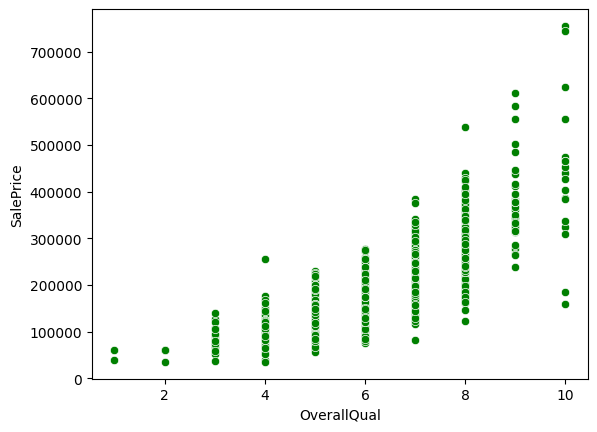

In [10]:
data_df = pd.read_csv('train.csv')
#plt.figure(figsize=(8, 4), dpi=150)
sns.scatterplot(x='OverallQual', y='SalePrice', data=data_df, color='green')

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

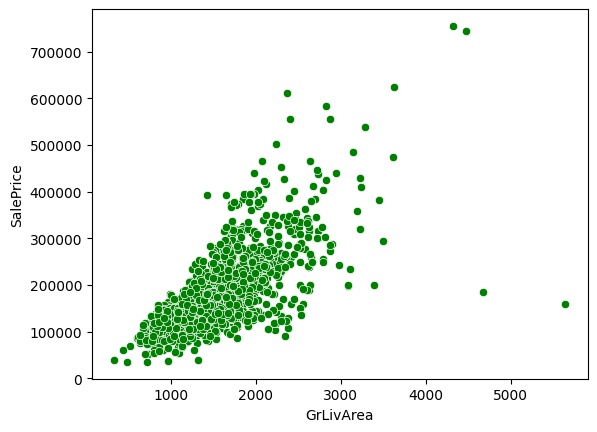

In [11]:
data_df = pd.read_csv('train.csv')
#plt.figure(figsize=(8, 4), dpi=150)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data_df, color='green')

We see a few oultiers going forward, we will remove these outlier from training data sets. Any where price > 4000 & price is < $200,000.00

Perperation of Data for Trainig
---
**Float Features**

Several `Float` Features have missing values.
We use mean values of the feature to fill in the missing value.

---


**Categorical Features **

Several `Categorical` Features have missing values.
We use mode values of the feature to fill in the missing value or N/A.

---

**Encoding**


For `Categorical` Features have missing values. We have used Sklearn's Label Encoder to convert catergorical features into intergers which help the Regressor models.


In [18]:
print(data_df.isnull().sum()[data_df.isnull().sum() > 0 ])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Display Numerical Columns via Histograms

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

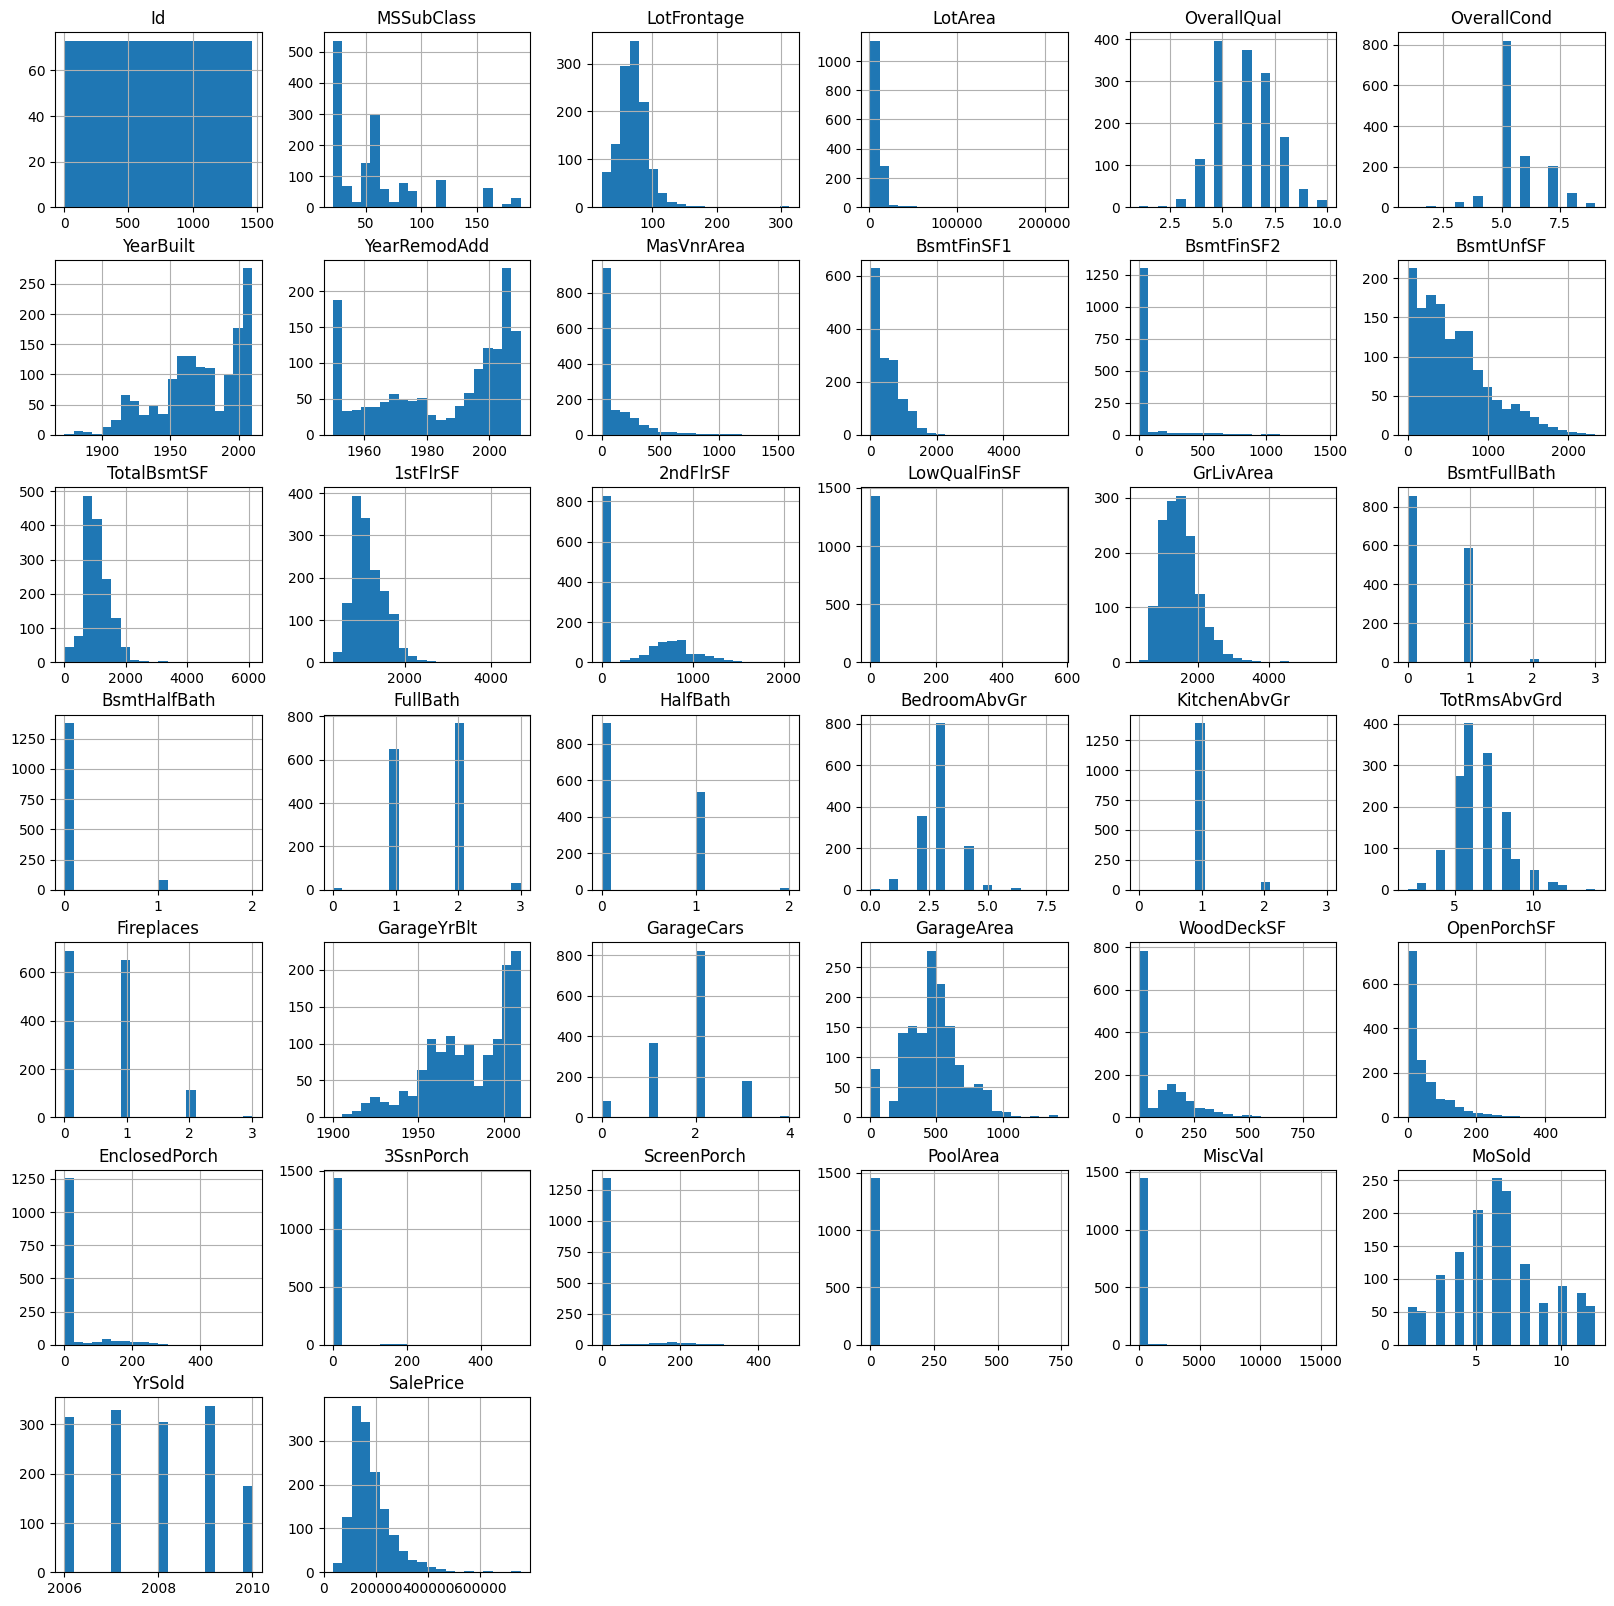

In [29]:
data_df.hist(bins=20, figsize=(20, 20))


Display Data Correlation with Correlation to Sale Price

In [31]:
import numpy as np
# Correlation of all NUMERIC columns with eachother (matrix).
corr_matrix = data_df.select_dtypes(include=[np.number]).corr()

# Correlation of all NUMERIC columns with SalePrice.
corr_saleprice = data_df.select_dtypes(include=[np.number]).corrwith(data_df['SalePrice'])
display(corr_matrix)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


**Display Data Correlation with Correlation to Sale Price**

Correlation to Sales starts to give a indication which features will be important. & SHAP should validate the important features


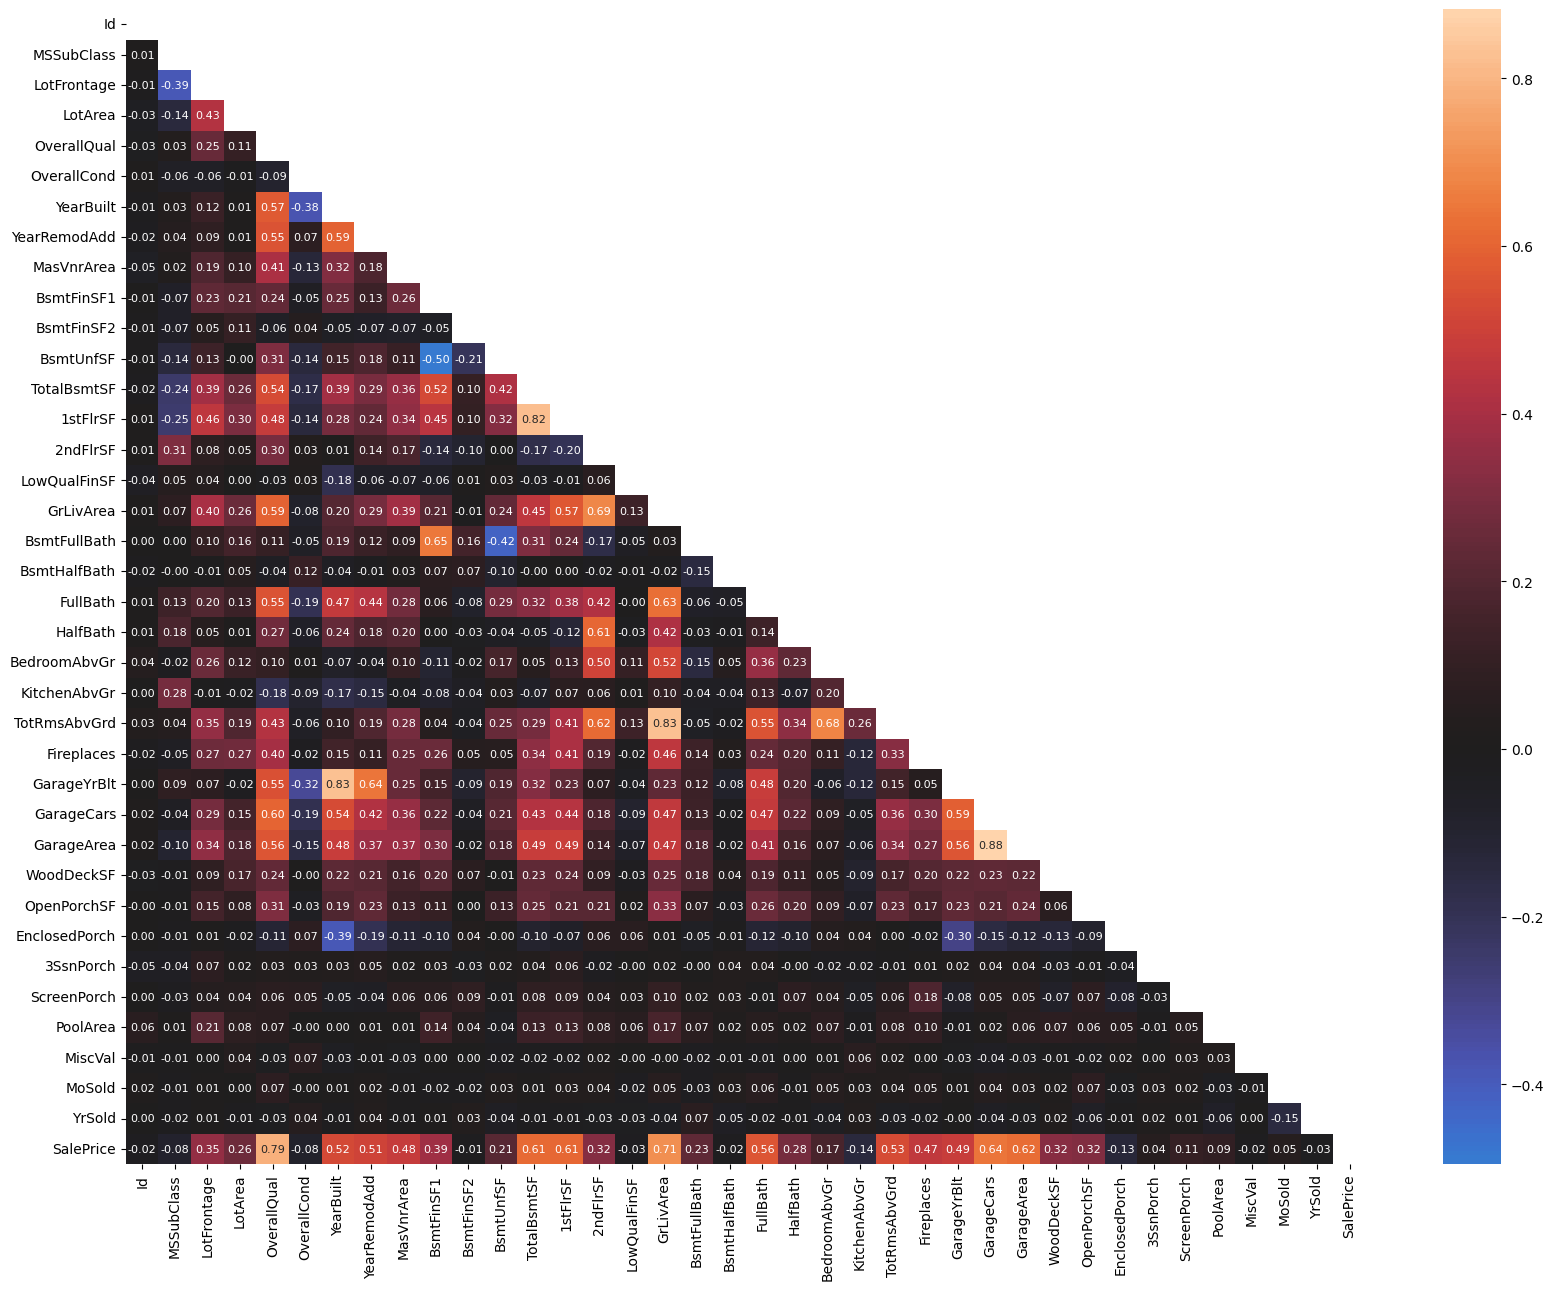

In [34]:
fig, ax = plt.subplots(figsize=(20, 15))
# my_palette = LinearSegmentedColormap.from_list(name='my_correlation_colours',
#                                                colors=['red', 'white', 'white', 'green'])

_ = sns.heatmap(data=corr_matrix,
                ax=ax,
                mask=np.triu(corr_matrix, k=0),
                center=0,
                annot=True,
                annot_kws={'fontsize': 8},
                fmt='.2f')

**Neighborhood by  Lot Area**

<Axes: xlabel='LotFrontage', ylabel='Neighborhood'>

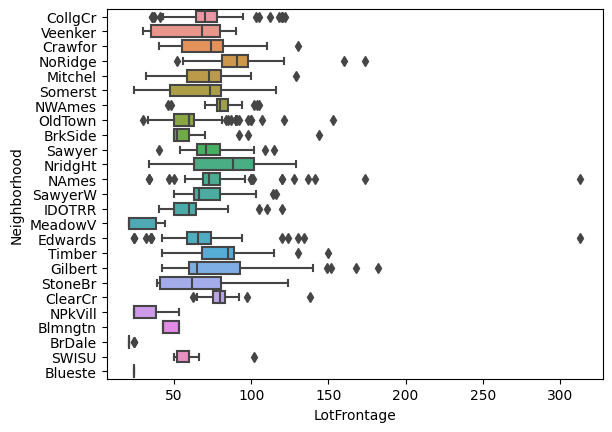

In [20]:
#plt.figure(figsize=(8, 12))
sns.boxplot(x='LotFrontage', y='Neighborhood', data=data_df, orient='h')

**Neighborhood by SalePrice**

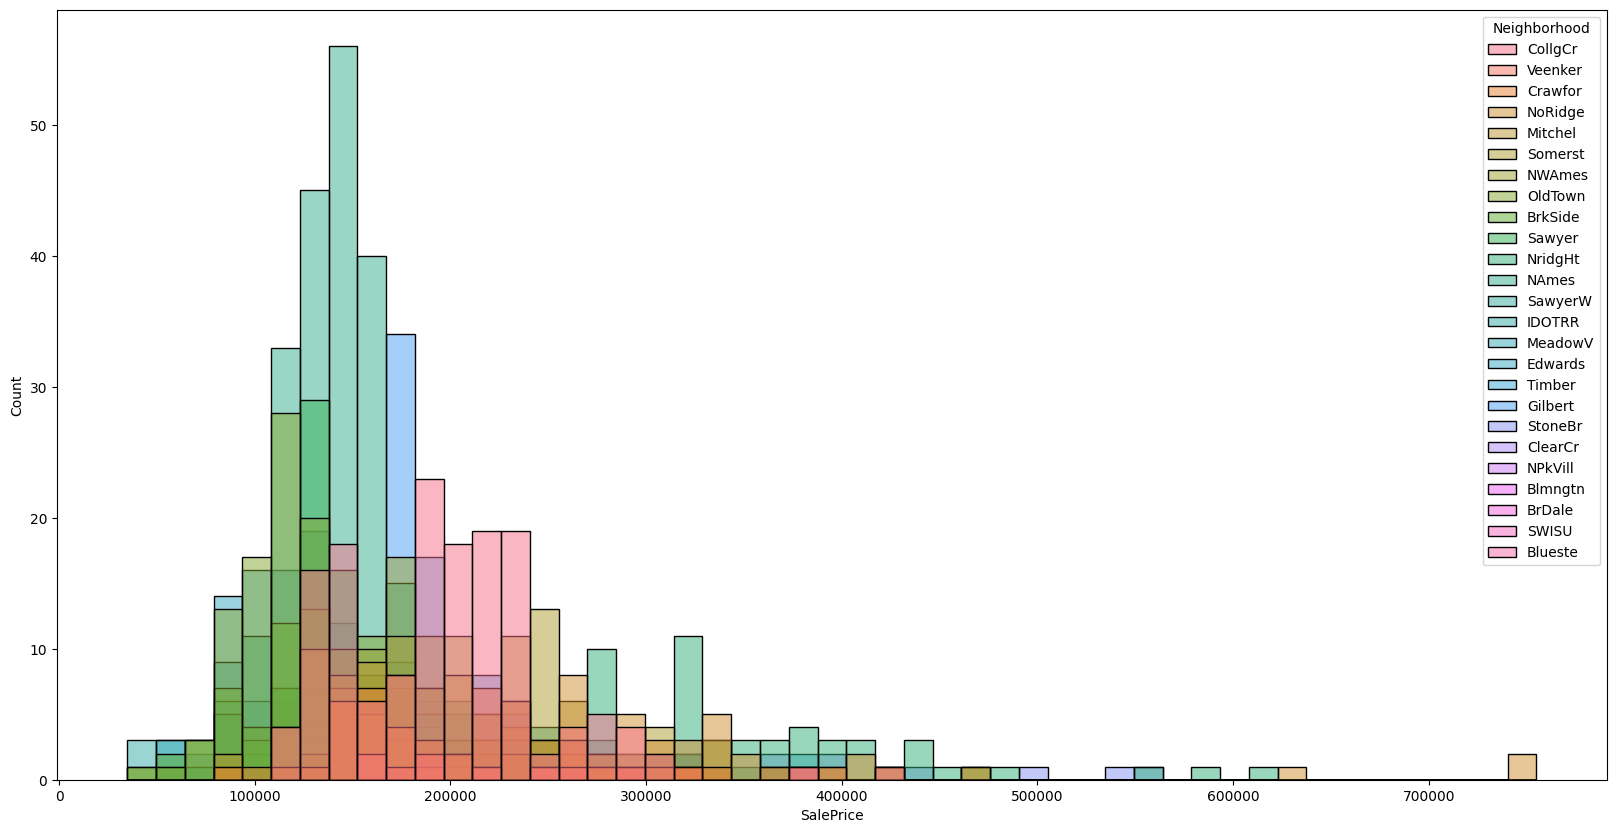

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))
_ = sns.histplot(x=data_df['SalePrice'],
                 ax=ax,
                 #bins=20,
                 hue=data_df['Neighborhood'] )

**Tunning the models**

* Optuna was used to define an objective & train the model
* Best hyper parameters were used fit the model
* Regressors were used predict the target vairable
* MSE was used to calculate the loss value.

*Results*

Idx | Regressors | MSE Value
--- | --- | ---
1 | LGBMRegressor |  1,489,559,647.63
2 | RandomForestRegressor |  7,596,139,801.11
3 | DecisionTreeRegressor |  7,586,972,381.89



**Explainable AI (using SHAP) **
**In Milestone 3 we have used 3 model**

Please see Milestone 3 for the results for SHAP
We used following Features ( important features to train & Create the streamlist application )

Idx | Important Features
--- | ---
1|GrLivArea
2|TotalBsmtSF
3|BsmtFinSF1
4|YearBuilt
5|GarageCars
6|GarageArea
7|YearRemodAdd
8|LotArea
9|OverAllCond
10|Fireplaces
11|1stFlrSF
12|2ndFlrSF
13|FullBatch
14|HalFBath
15|MSSubClass


[Milestone3 Workbook  with Expalianable AI](https://github.com/vkchadha12/cs634/tree/milestone-3)

[Streamlit App Workbook](https://github.com/vkchadha12/cs634/blob/milestone-3/cs634_milestone3_streamlit_app.ipynb)